In [1]:
import wandb
import pandas as pd

wandb.login()

wandb: Currently logged in as: jack-j-desmarais (jjd_academic) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [2]:
api = wandb.Api()

runs = api.runs(path='jjd_academic/sparse_autoencoders',
         filters={"config.cfg.exp_name": 'v12_topk_sweep'})
dfs = {}
for run in runs:
    # print(run.config)
    val_class_metrics = run.history(samples=1000, keys=['epoch', '_runtime','val_num_dead_features','val_loss','val_l1_loss','val_l2_loss','val_l0_norm','val_l1_norm','val_aux_loss'])
    train_metrics = run.history(samples=1000, keys=['epoch','train_num_dead_features','train_loss','train_l1_loss','train_l2_loss','train_l0_norm','train_l1_norm','train_aux_loss'])
    # print(f'{val_class_metrics=}')
    # print(f'{train_metrics=}')
    if (not val_class_metrics.empty) and (not train_metrics.empty):
        val_class_metrics.loc[0,'epoch'] = -1
        metrics = pd.merge(left=val_class_metrics.drop(columns='_step'), right=train_metrics.drop(columns='_step'), on='epoch', how='outer')

        dfs[(run.config['cfg']['dict_size'],run.config['cfg']['top_k'], run.config['cfg']['top_k_aux'], run.config['cfg']['aux_penalty'],run.config['cfg']['num_workers'])] = metrics
metrics = pd.concat(dfs)
metrics.columns.name = 'Metrics'
metrics.index.names = ['dict_size','topk','topk_aux','aux_penalty','num_workers','epoch']

metrics

Metrics                                                epoch      _runtime  \
dict_size topk topk_aux aux_penalty num_workers epoch                        
256       4    16       1.00        64          0         -1    103.680183   
                                                1          0    529.954162   
                                                2          1    917.558239   
                                                3          2   1304.743047   
                                                4          3   1685.175478   
...                                                      ...           ...   
          32   128      0.01        64          72        71  26462.307196   
                                                73        72  27515.752300   
                                                74        73  27515.757551   
                                                75        74  27592.349227   
                                                76        75  27666.715603   

Metrics                                                val_num_dead_features  \
dict_size topk topk_aux aux_penalty num_workers epoch                          
256       4    16       1.00        64          0                  59.166401   
                                                1                   3.244967   
                                                2                   0.412403   
                                                3                   0.873691   
                                                4                   0.149368   
...                                                                      ...   
          32   128      0.01        64          72                174.999878   
                                                73                174.999878   
                                                74                174.999878   
                                                75                174.311172   
                                                76                174.333908   

Metrics                                                  val_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch               
256       4    16       1.00        64          0      445.738037   
                                                1      116.610741   
                                                2       61.852077   
                                                3       67.987793   
                                                4       43.968338   
...                                                           ...   
          32   128      0.01        64          72       0.001466   
                                                73       0.001459   
                                                74       0.001453   
                                                75       0.001451   
                                                76       0.001451   

Metrics                                                val_l1_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch                
256       4    16       1.00        64          0                0   
                                                1                0   
                                                2                0   
                                                3                0   
                                                4                0   
...                                                            ...   
          32   128      0.01        64          72               0   
                                                73               0   
                                                74               0   
                                                75               0   
                                                76               0   

Metrics                                                val_l2_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch            

In [3]:
metrics.to_csv('./v12_topk_sweep-Training_traces.csv')

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_context('notebook')
sns.set_palette('colorblind')

metrics = pd.read_csv('./v12_topk_sweep-Training_traces.csv',index_col=[0,1,2,3,4,5,6,7], header=0)
metrics.columns.name = 'Metrics'
display(metrics)

Metrics                                                                     val_num_dead_features  \
dict_size topk topk_aux aux_penalty num_workers epoch epoch.1 _runtime                              
256       4    16       1.00        64          0     -1      103.680183                59.166401   
                                                1      0      529.954162                 3.244967   
                                                2      1      917.558239                 0.412403   
                                                3      2      1304.743047                0.873691   
                                                4      3      1685.175478                0.149368   
...                                                                                           ...   
          32   128      0.01        64          72     71     26462.307196             174.999878   
                                                73     72     27515.752300             174.999878   
                                                74     73     27515.757551             174.999878   
                                                75     74     27592.349227             174.311172   
                                                76     75     27666.715603             174.333908   

Metrics                                                                       val_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch epoch.1 _runtime                   
256       4    16       1.00        64          0     -1      103.680183    445.738037   
                                                1      0      529.954162    116.610741   
                                                2      1      917.558239     61.852077   
                                                3      2      1304.743047    67.987793   
                                                4      3      1685.175478    43.968338   
...                                                                                ...   
          32   128      0.01        64          72     71     26462.307196    0.001466   
                                                73     72     27515.752300    0.001459   
                                                74     73     27515.757551    0.001453   
                                                75     74     27592.349227    0.001451   
                                                76     75     27666.715603    0.001451   

Metrics                                                                     val_l1_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch epoch.1 _runtime                    
256       4    16       1.00        64          0     -1      103.680183              0   
                                                1      0      529.954162              0   
                                                2      1      917.558239              0   
                                                3      2      1304.743047             0   
                                                4      3      1685.175478             0   
...                                                                                 ...   
          32   128      0.01        64          72     71     26462.307196            0   
                                                73     72     27515.752300            0   
                                                74     73     27515.757551            0   
                                                75     74     27592.349227            0   
                                                76     75     27666.715603            0   

Metrics                                                                     val_l2_loss  \
dict_size topk topk_aux aux_penalty num_workers epoch epoch.1 _runtime                    
256       4    16       1.00        64          0     -1      103.680183     227.327057   
                                                1      0  

In [5]:
to_plot = metrics.reset_index()
to_plot.columns = [col.replace('_', ' ').strip() for col in to_plot.columns]
to_plot['val live features'] = to_plot['dict size'] - to_plot['val num dead features']
to_plot['train live features'] = to_plot['dict size'] - to_plot['train num dead features']
to_plot['running epoch time (sec)'] = to_plot['runtime']/to_plot['epoch']
to_plot['running epoch time (min)'] = to_plot['running epoch time (sec)']/60
display(to_plot)

,dict size,topk,topk aux,aux penalty,num workers,epoch,epoch.1,runtime,val num dead features,val loss,...,train loss,train l1 loss,train l2 loss,train l0 norm,train l1 norm,train aux loss,val live features,train live features,running epoch time (sec),running epoch time (min)
0,256,4,16,1.00,64,0,-1,103.680183,59.166401,445.738037,...,NaN,NaN,NaN,NaN,NaN,NaN,196.833599,NaN,inf,inf
1,256,4,16,1.00,64,1,0,529.954162,3.244967,116.610741,...,195.932709,0.0,109.464531,3.999986,140.579880,86.468361,252.755033,203.853645,529.954162,8.832569
2,256,4,16,1.00,64,2,1,917.558239,0.412403,61.852077,...,55.265102,0.0,49.291763,3.999986,173.047913,5.973357,255.587597,255.882352,458.779120,7.646319
3,256,4,16,1.00,64,3,2,1304.743047,0.873691,67.987793,...,57.413673,0.0,41.119061,3.999986,176.666504,16.294611,255.126309,255.701695,434.914349,7.248572
4,256,4,16,1.00,64,4,3,1685.175478,0.149368,43.968338,...,59.149738,0.0,38.600159,3.999986,165.060822,20.549603,255.850632,255.458428,421.293870,7.021564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,256,32,128,0.01,64,72,71,26462.307196,174.999878,0.001466,...,0.001477,0.0,0.001463,31.999884,399.884033,0.000015,81.000122,81.598953,367.532044,6.125534
6233,256,32,128,0.01,64,73,72,27515.752300,174.999878,0.001459,...,0.001472,0.0,0.001458,31.999884,399.785278,0.000014,81.000122,81.659744,376.928114,6.282135
6234,256,32,128,0.01,64,74,73,27515.757551,174.999878,0.001453,...,0.001463,0.0,0.001448,31.999884,399.686829,0.000014,81.000122,81.422867,371.834562,6.197243
6235,256,32,128,0.01,64,75,74,27592.349227,174.311172,0.001451,...,0.001457,0.0,0.001443,31.999886,399.594696,0.000014,81.688828,80.935791,367.897990,6.131633


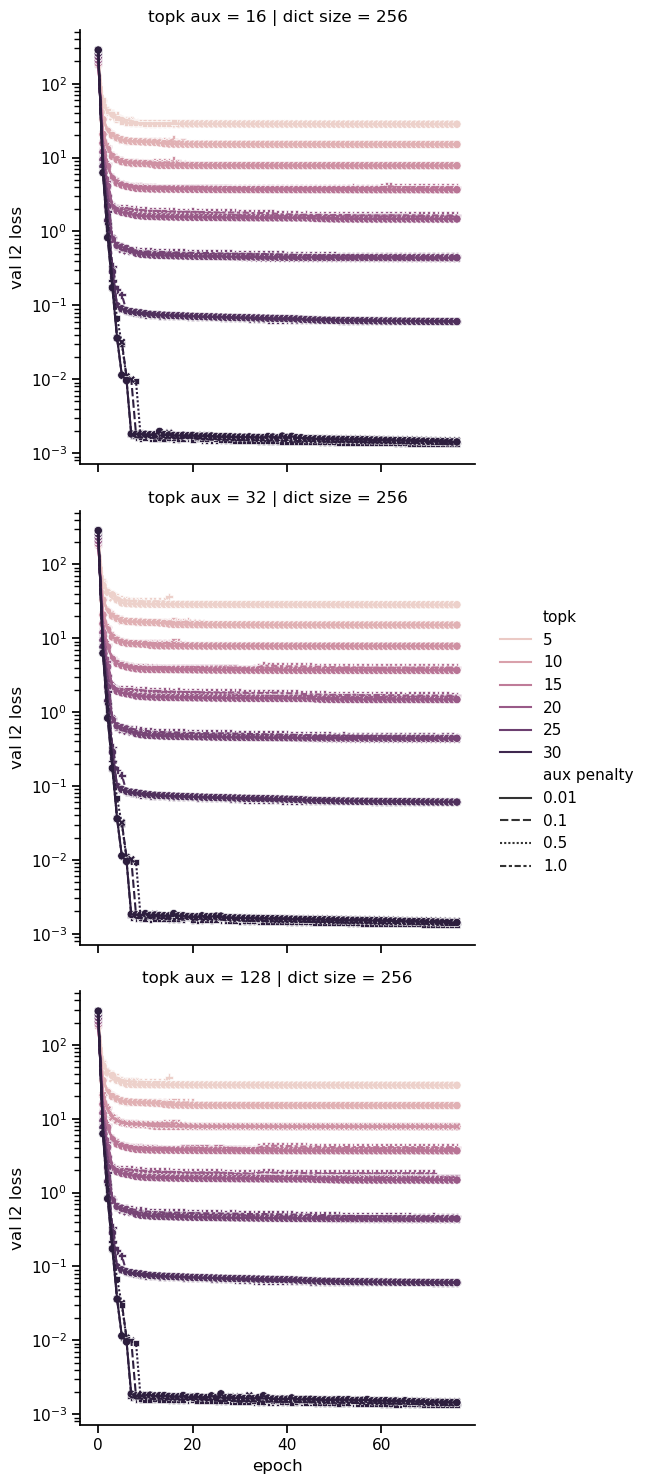

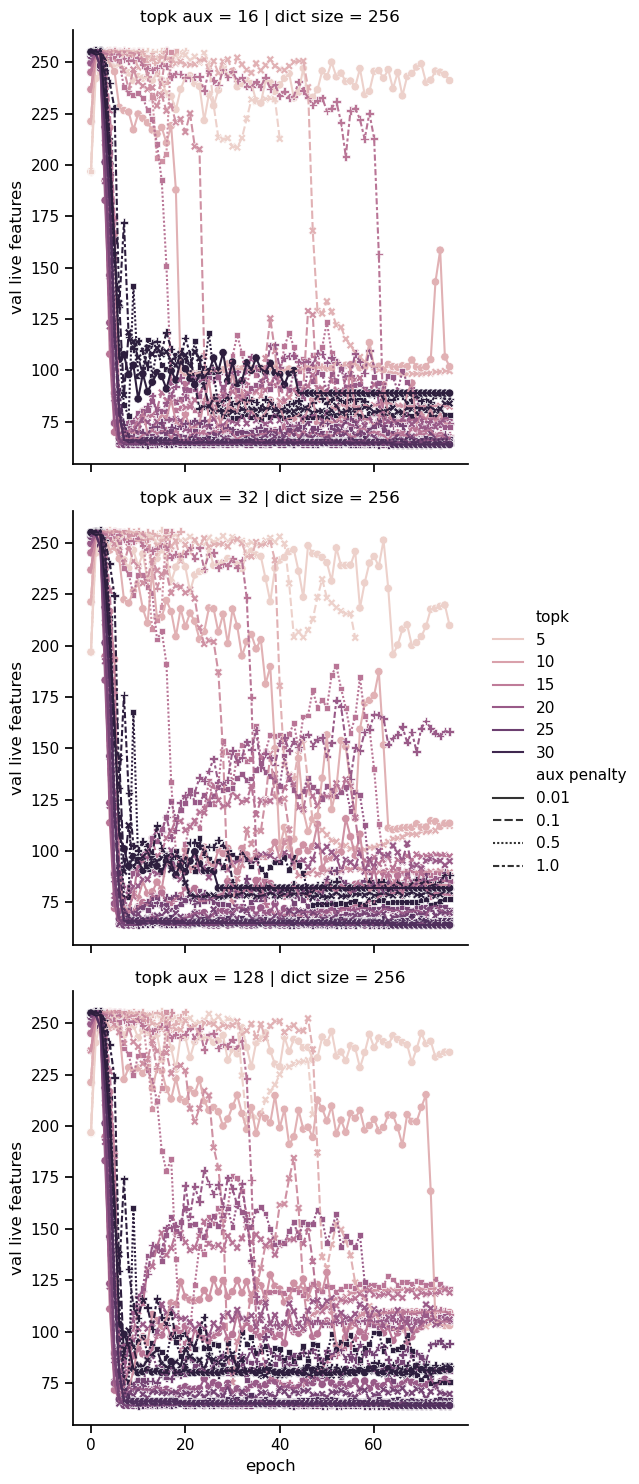

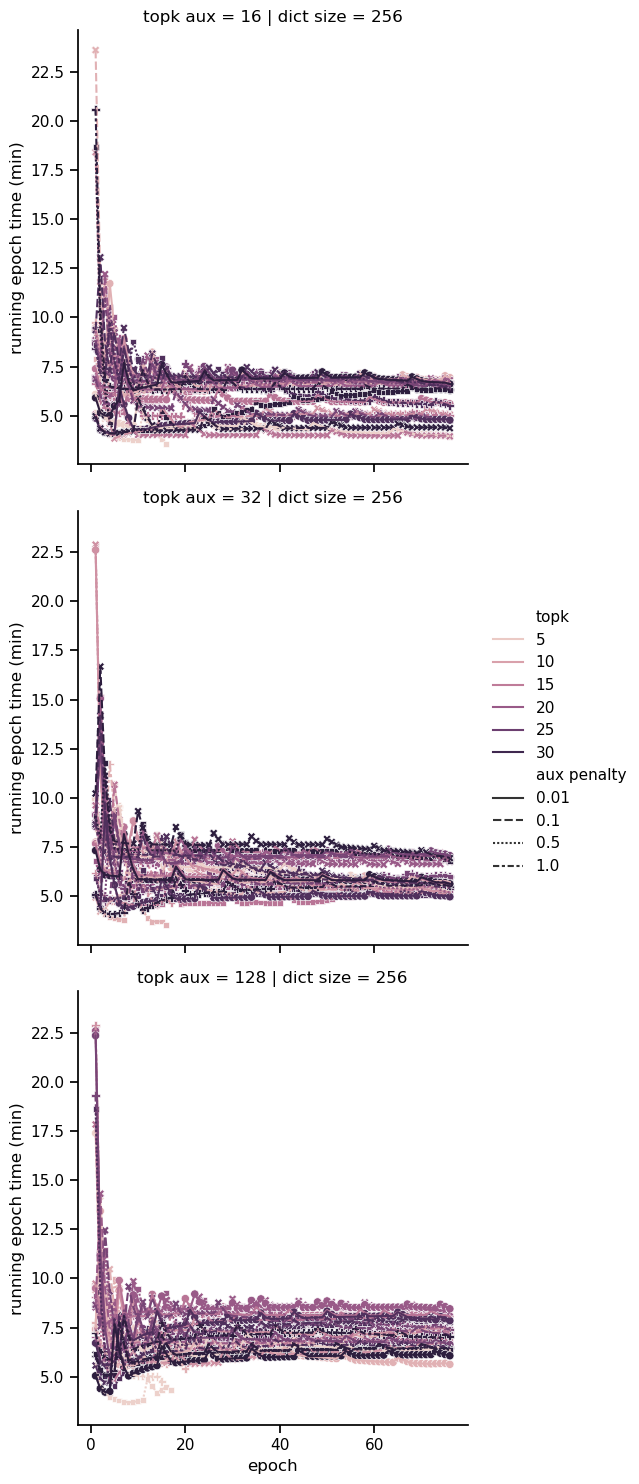

In [18]:
test_cols = ['val l2 loss','val live features', 'running epoch time (min)']
to_plot['num workers'] = pd.Categorical(to_plot['num workers'])


for col in test_cols:
    g= sns.relplot(data=to_plot, kind='line',
                x= 'epoch', y=col, 
                style='aux penalty',
                hue='topk',
                col='dict size',
                row='topk aux')
    
    g.map_dataframe(sns.scatterplot, x= 'epoch', y=col, 
                hue='topk', style='aux penalty')
    # g.refline(x=20, color='k', linestyle='--', alpha=0.5)
    # g.refline(x=39, color='k', linestyle='--', alpha=0.5)
    if col == 'val l2 loss':
        # plt.ylim(0.1,5)
        plt.yscale('log')
        
    
    # g.refline(y=spliceAI_mets.loc['2024_12_14_SpliceAI_10k_Cryptic_test_metirics_no_topK_untrained_alphas_nologits.pckl',col[4:]], 
    #             c='k', alpha=0.5, linestyle='--', label='SpliceAI 10kb ensemble')
    # g.refline(y=spliceAI_mets.loc['2024_12_14_SpliceAI_400_Cryptic_test_metirics_no_topK_untrained_alphas_nologits.pckl',col[4:]], 
    #             c='k', alpha=0.6, linestyle='-.', label='SpliceAI 400bp ensemble')
    plt.show()

In [7]:
bar = to_plot.loc[to_plot.groupby(['topk aux','topk','dict size', 'aux penalty'], observed=True)['val loss'].idxmin()]
bar

,dict size,topk,topk aux,aux penalty,num workers,epoch,epoch.1,runtime,val num dead features,val loss,...,train loss,train l1 loss,train l2 loss,train l0 norm,train l1 norm,train aux loss,val live features,train live features,running epoch time (sec),running epoch time (min)
138,256,4,16,0.01,64,76,75,18033.041178,14.907246,28.586018,...,NaN,NaN,NaN,NaN,NaN,NaN,241.092754,NaN,237.276858,3.954614
61,256,4,16,0.10,64,40,39,10189.818456,43.271069,30.868519,...,NaN,NaN,NaN,NaN,NaN,NaN,212.728931,NaN,254.745461,4.245758
178,256,4,16,0.50,64,5,4,1173.566414,0.174507,33.913834,...,38.968708,0.0,32.386707,3.999986,146.050125,6.581975,255.825493,255.692837,234.713283,3.911888
9,256,4,16,1.00,64,9,8,3566.559716,0.369757,40.422569,...,40.784531,0.0,29.260517,3.999986,147.152756,11.523993,255.630243,255.699036,396.284413,6.604740
687,256,8,16,0.01,64,71,70,29115.590082,154.178391,15.162280,...,15.136555,0.0,15.035454,7.999972,192.852997,0.101101,101.821609,104.104889,410.078734,6.834646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5080,256,28,128,1.00,64,75,74,29431.289523,191.999908,0.121181,...,0.120572,0.0,0.060290,28.000118,304.396484,0.060283,64.000092,64.023438,392.417194,6.540287
6235,256,32,128,0.01,64,75,74,27592.349227,174.311172,0.001451,...,0.001457,0.0,0.001443,31.999886,399.594696,0.000014,81.688828,80.935791,367.897990,6.131633
6082,256,32,128,0.10,64,76,75,29102.035765,172.877365,0.001623,...,NaN,NaN,NaN,NaN,NaN,NaN,83.122635,NaN,382.921523,6.382025
6158,256,32,128,0.50,64,75,74,28875.602682,180.723419,0.001958,...,0.001949,0.0,0.001303,31.999886,375.876740,0.000646,75.276581,75.647049,385.008036,6.416801


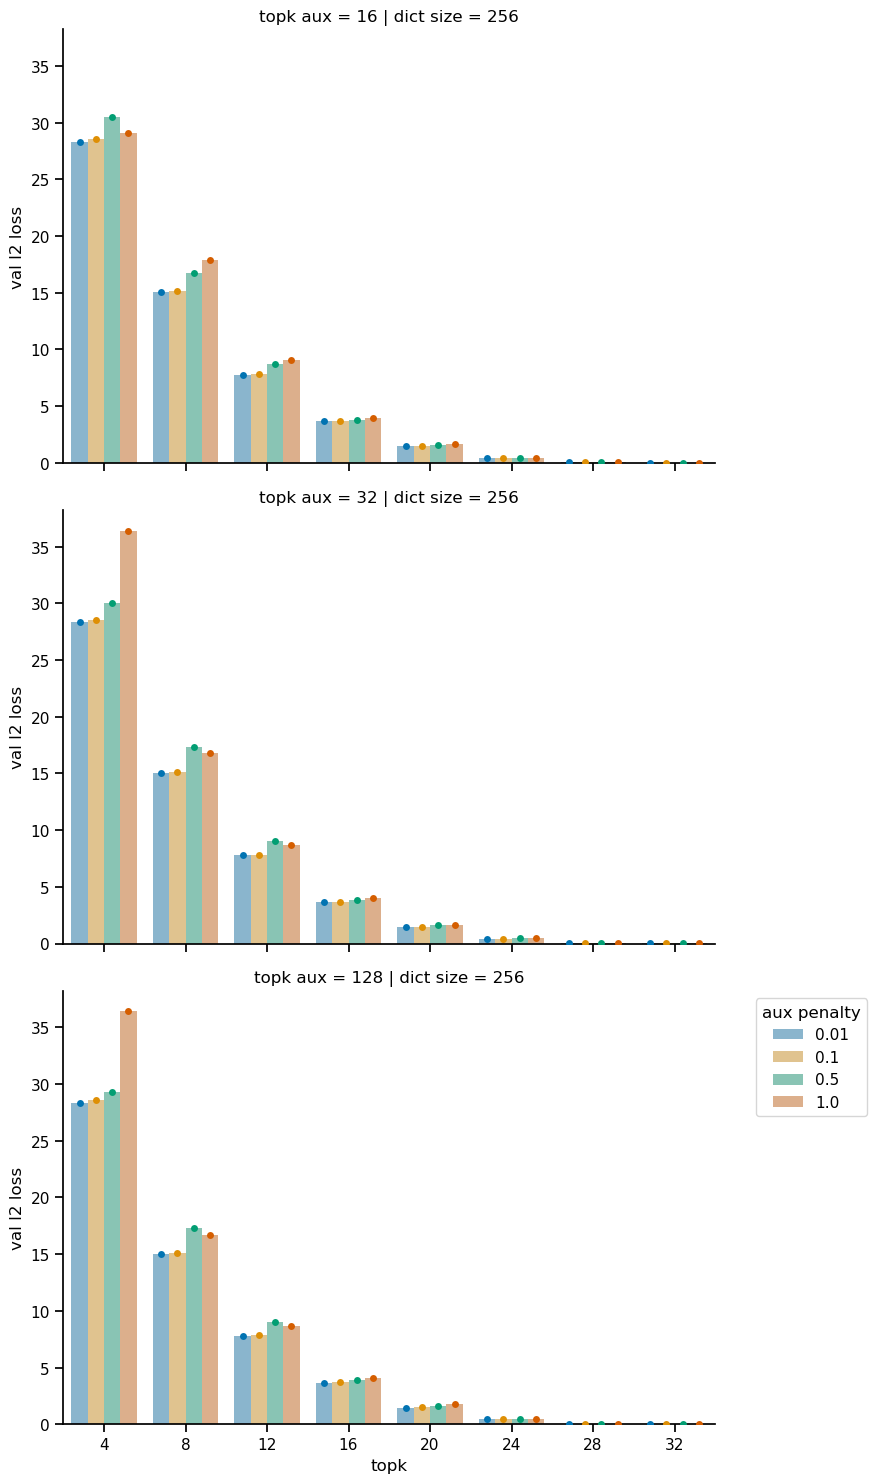

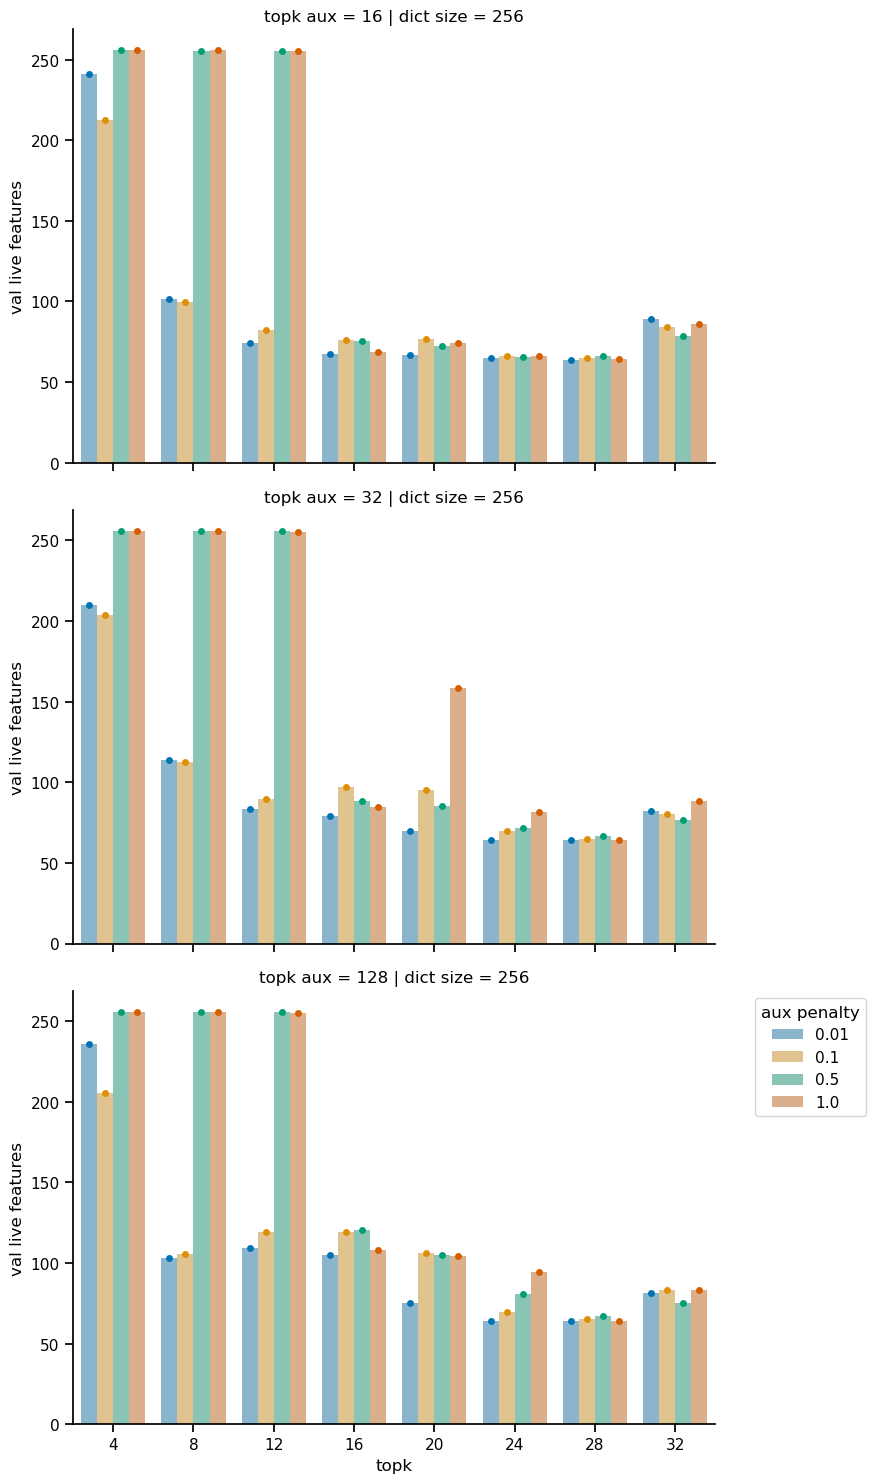

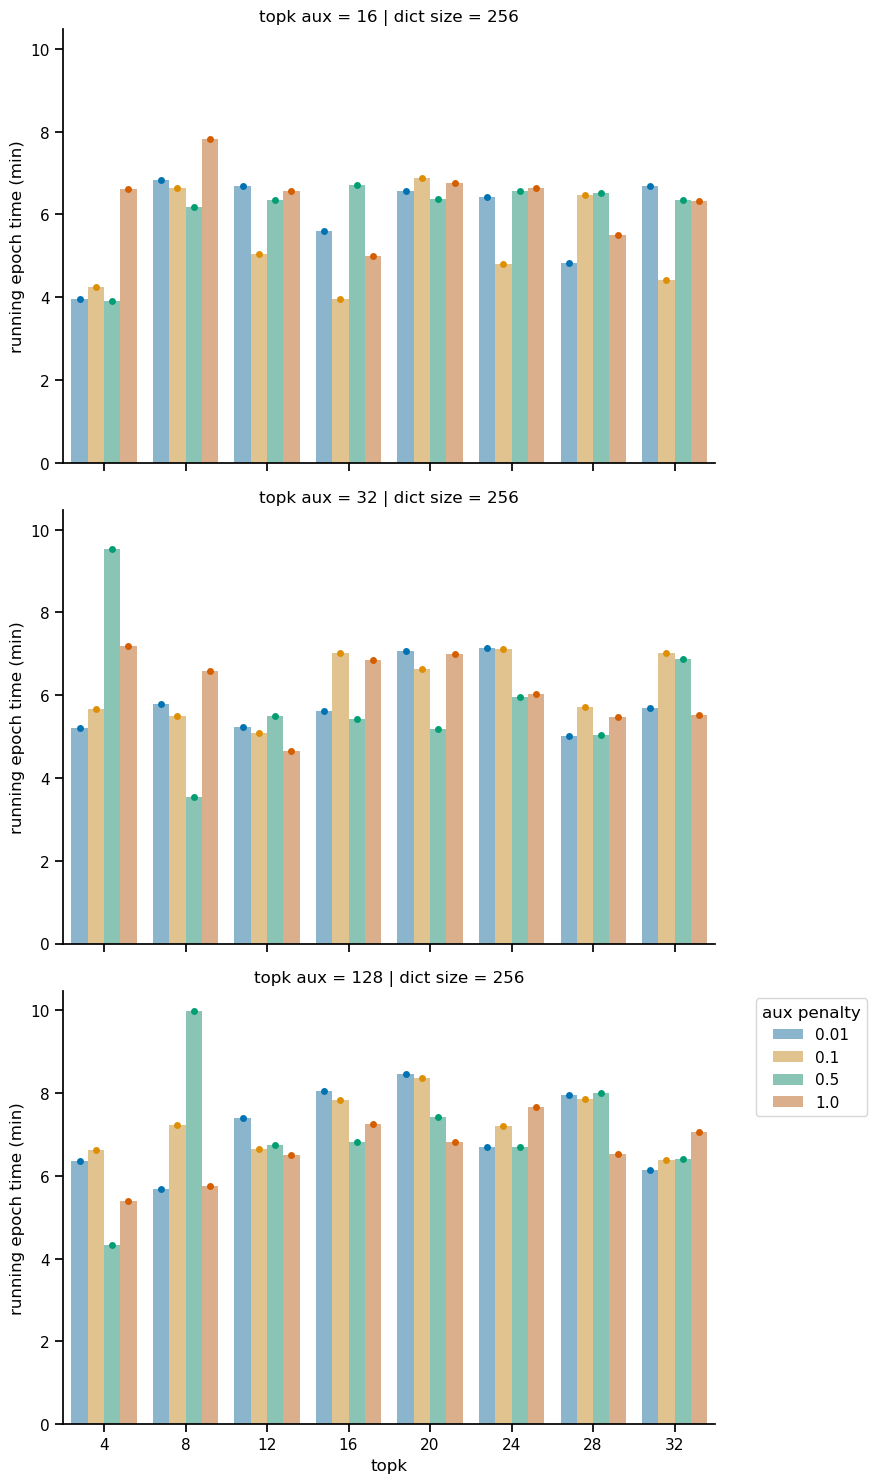

In [8]:
bar_plot = bar.copy()
# bar_plot['topk aux'] = 2 ** np.round(np.log2(bar_plot['topk aux']))

bar_plot['aux penalty'] = bar_plot['aux penalty'].astype(str)
hue_order = ['0.01', '0.1', '0.5', '1.0']
palette = ['C0','C1','C2','C3']
for col in test_cols:
    g = sns.catplot(data=bar_plot, kind='bar',
                    y=col, alpha=0.5,
                    hue='aux penalty',
                    x='topk',
                    col='dict size',
                    row='topk aux',
                    hue_order=hue_order,
                    palette=palette,
                    aspect=1.5, 
                    # col_wrap=3, 
                    legend=True)
    g.legend.remove()
    g.map_dataframe(sns.swarmplot, y=col, 
                    hue='aux penalty',
                    x='topk',
                    hue_order=hue_order,
                    palette=palette,
                    dodge=True,
                    legend=False)
    
    plt.legend(title='aux penalty', bbox_to_anchor=(1.05, 1), loc='upper left')


In [9]:
api = wandb.Api()

runs = api.runs(path='jjd_academic/sparse_autoencoders',
         filters={"config.cfg.exp_name": 'v12_topk_sweep'})
dfs = {}
for run in runs:
    # print(run)
    # print(run.config)
    test_class_metrics = run.history(samples=1000, keys=['test_num_dead_features','test_loss','test_l1_loss','test_l2_loss','test_l0_norm','test_l1_norm','test_aux_loss'])
    # print(f'{test_class_metrics=}')
    # print(f'{train_metrics=}')
    if (not test_class_metrics.empty):
        metrics = test_class_metrics.drop(columns='_step')

        dfs[(run.config['cfg']['dict_size'],run.config['cfg']['top_k'], run.config['cfg']['top_k_aux'], run.config['cfg']['aux_penalty'])] = metrics

metrics = pd.concat(dfs)
metrics.columns.name = 'Metrics'
metrics.index.names = ['dict_size','topk','topk_aux','aux_penalty','epoch']

metrics

Metrics                                    test_num_dead_features  test_loss  \
dict_size topk topk_aux aux_penalty epoch                                      
256       4    16       1.00        0                    0.612903  46.043633   
                        0.10        0                   48.129028  30.929604   
                        0.01        0                   16.064516  28.676435   
               32       1.00        0                    0.258065  42.368786   
                        0.50        0                    0.548387  40.262295   
...                                                           ...        ...   
          32   32       0.01        0                  173.999954   0.001436   
               128      1.00        0                  172.709702   0.002724   
                        0.10        0                  172.548386   0.001627   
                        0.50        0                  179.129028   0.001965   
                        0.01        0                  174.000000   0.001456   

Metrics                                    test_l1_loss  test_l2_loss  \
dict_size topk topk_aux aux_penalty epoch                               
256       4    16       1.00        0                 0     29.200821   
                        0.10        0                 0     28.682047   
                        0.01        0                 0     28.422119   
               32       1.00        0                 0     36.510029   
                        0.50        0                 0     30.115402   
...                                                 ...           ...   
          32   32       0.01        0                 0      0.001421   
               128      1.00        0                 0      0.001370   
                        0.10        0                 0      0.001481   
                        0.50        0                 0      0.001314   
                        0.01        0                 0      0.001442   

Metrics                                    test_l0_norm  test_l1_norm  \
dict_size topk topk_aux aux_penalty epoch                               
256       4    16       1.00        0                 4    147.692276   
                        0.10        0                 4    147.891876   
                        0.01        0                 4    147.949127   
               32       1.00        0                 4    158.259918   
                        0.50        0                 4    146.335846   
...                                                 ...           ...   
          32   32       0.01        0                32    403.967773   
               128      1.00        0                32    398.432159   
                        0.10        0                32    393.085449   
                        0.50        0                32    377.180298   
                        0.01        0                32    400.723297   

Metrics                                    test_aux_loss  
dict_size topk topk_aux aux_penalty epoch                 
256       4    16       1.00        0          16.842815  
                        0.10        0           2.247554  
                        0.01        0           0.254316  
               32       1.00        0           5.858760  
                        0.50        0          10.146892  
...                                                  ...  
          32   32       0.01        0           0.000014  
               128      1.00        0           0.001354  
                        0.10        0           0.000146  
                        0.50        0           0.000651  
                        0.01        0           0.000014  

[96 rows x 7 columns]

In [10]:
metrics.to_csv('./v12_topk_sweep-test_results.csv')

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set_context('notebook')
sns.set_palette('colorblind')

metrics = pd.read_csv('./v12_topk_sweep-test_results.csv',index_col=[0,1,2,3,4], header=0)
metrics.columns.name = 'Metrics'
display(metrics)

Metrics                                    test_num_dead_features  test_loss  \
dict_size topk topk_aux aux_penalty epoch                                      
256       4    16       1.00        0                    0.612903  46.043633   
                        0.10        0                   48.129028  30.929604   
                        0.01        0                   16.064516  28.676435   
               32       1.00        0                    0.258065  42.368786   
                        0.50        0                    0.548387  40.262295   
...                                                           ...        ...   
          32   32       0.01        0                  173.999954   0.001436   
               128      1.00        0                  172.709702   0.002724   
                        0.10        0                  172.548386   0.001627   
                        0.50        0                  179.129028   0.001965   
                        0.01        0                  174.000000   0.001456   

Metrics                                    test_l1_loss  test_l2_loss  \
dict_size topk topk_aux aux_penalty epoch                               
256       4    16       1.00        0                 0     29.200821   
                        0.10        0                 0     28.682047   
                        0.01        0                 0     28.422119   
               32       1.00        0                 0     36.510029   
                        0.50        0                 0     30.115402   
...                                                 ...           ...   
          32   32       0.01        0                 0      0.001421   
               128      1.00        0                 0      0.001370   
                        0.10        0                 0      0.001481   
                        0.50        0                 0      0.001314   
                        0.01        0                 0      0.001442   

Metrics                                    test_l0_norm  test_l1_norm  \
dict_size topk topk_aux aux_penalty epoch                               
256       4    16       1.00        0                 4    147.692276   
                        0.10        0                 4    147.891876   
                        0.01        0                 4    147.949127   
               32       1.00        0                 4    158.259918   
                        0.50        0                 4    146.335846   
...                                                 ...           ...   
          32   32       0.01        0                32    403.967773   
               128      1.00        0                32    398.432159   
                        0.10        0                32    393.085449   
                        0.50        0                32    377.180298   
                        0.01        0                32    400.723297   

Metrics                                    test_aux_loss  
dict_size topk topk_aux aux_penalty epoch                 
256       4    16       1.00        0          16.842815  
                        0.10        0           2.247554  
                        0.01        0           0.254316  
               32       1.00        0           5.858760  
                        0.50        0          10.146892  
...                                                  ...  
          32   32       0.01        0           0.000014  
               128      1.00        0           0.001354  
                        0.10        0           0.000146  
                        0.50        0           0.000651  
                        0.01        0           0.000014  

[96 rows x 7 columns]

In [12]:
test_plot = metrics.reset_index()
test_plot.columns = [col.replace('_', ' ') for col in test_plot.columns]
test_plot['test live features'] = test_plot['dict size'] - test_plot['test num dead features']
display(test_plot)

,dict size,topk,topk aux,aux penalty,epoch,test num dead features,test loss,test l1 loss,test l2 loss,test l0 norm,test l1 norm,test aux loss,test live features
0,256,4,16,1.00,0,0.612903,46.043633,0,29.200821,4,147.692276,16.842815,255.387097
1,256,4,16,0.10,0,48.129028,30.929604,0,28.682047,4,147.891876,2.247554,207.870972
2,256,4,16,0.01,0,16.064516,28.676435,0,28.422119,4,147.949127,0.254316,239.935484
3,256,4,32,1.00,0,0.258065,42.368786,0,36.510029,4,158.259918,5.858760,255.741935
4,256,4,32,0.50,0,0.548387,40.262295,0,30.115402,4,146.335846,10.146892,255.451613
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,256,32,32,0.01,0,173.999954,0.001436,0,0.001421,32,403.967773,0.000014,82.000046
92,256,32,128,1.00,0,172.709702,0.002724,0,0.001370,32,398.432159,0.001354,83.290298
93,256,32,128,0.10,0,172.548386,0.001627,0,0.001481,32,393.085449,0.000146,83.451614
94,256,32,128,0.50,0,179.129028,0.001965,0,0.001314,32,377.180298,0.000651,76.870972


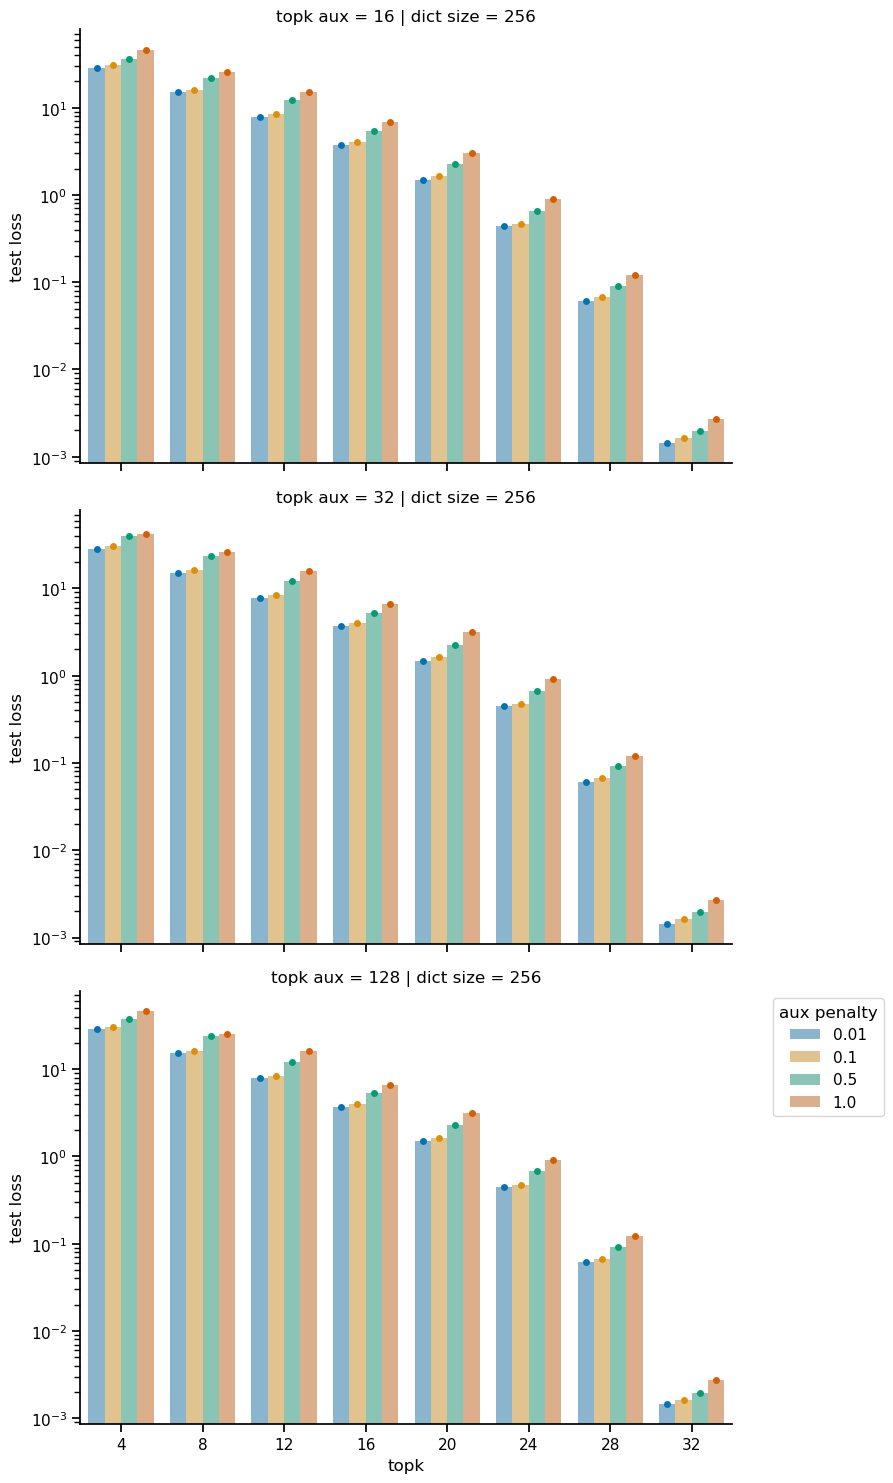

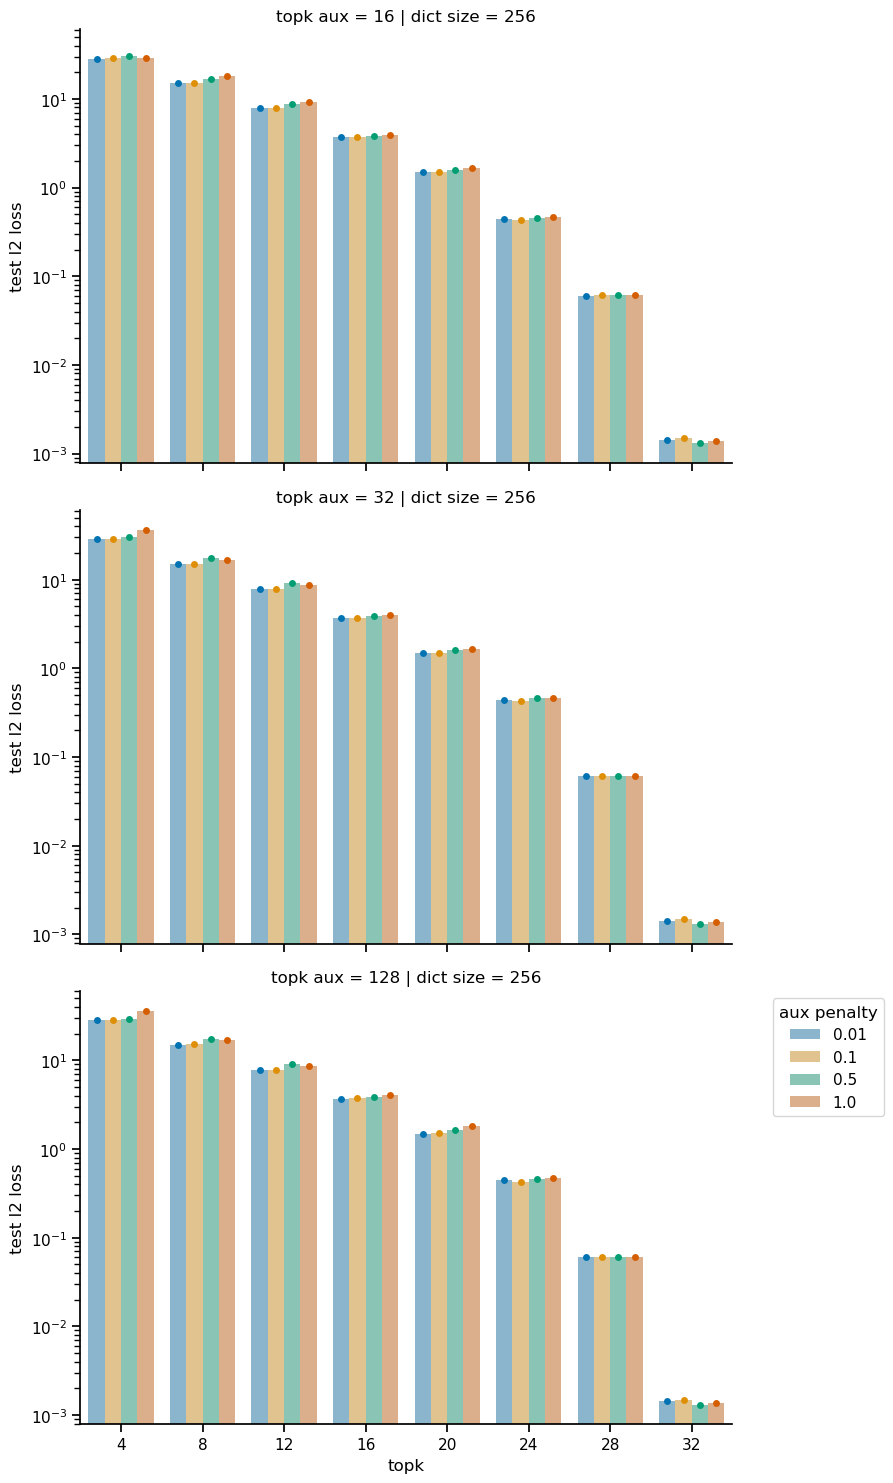

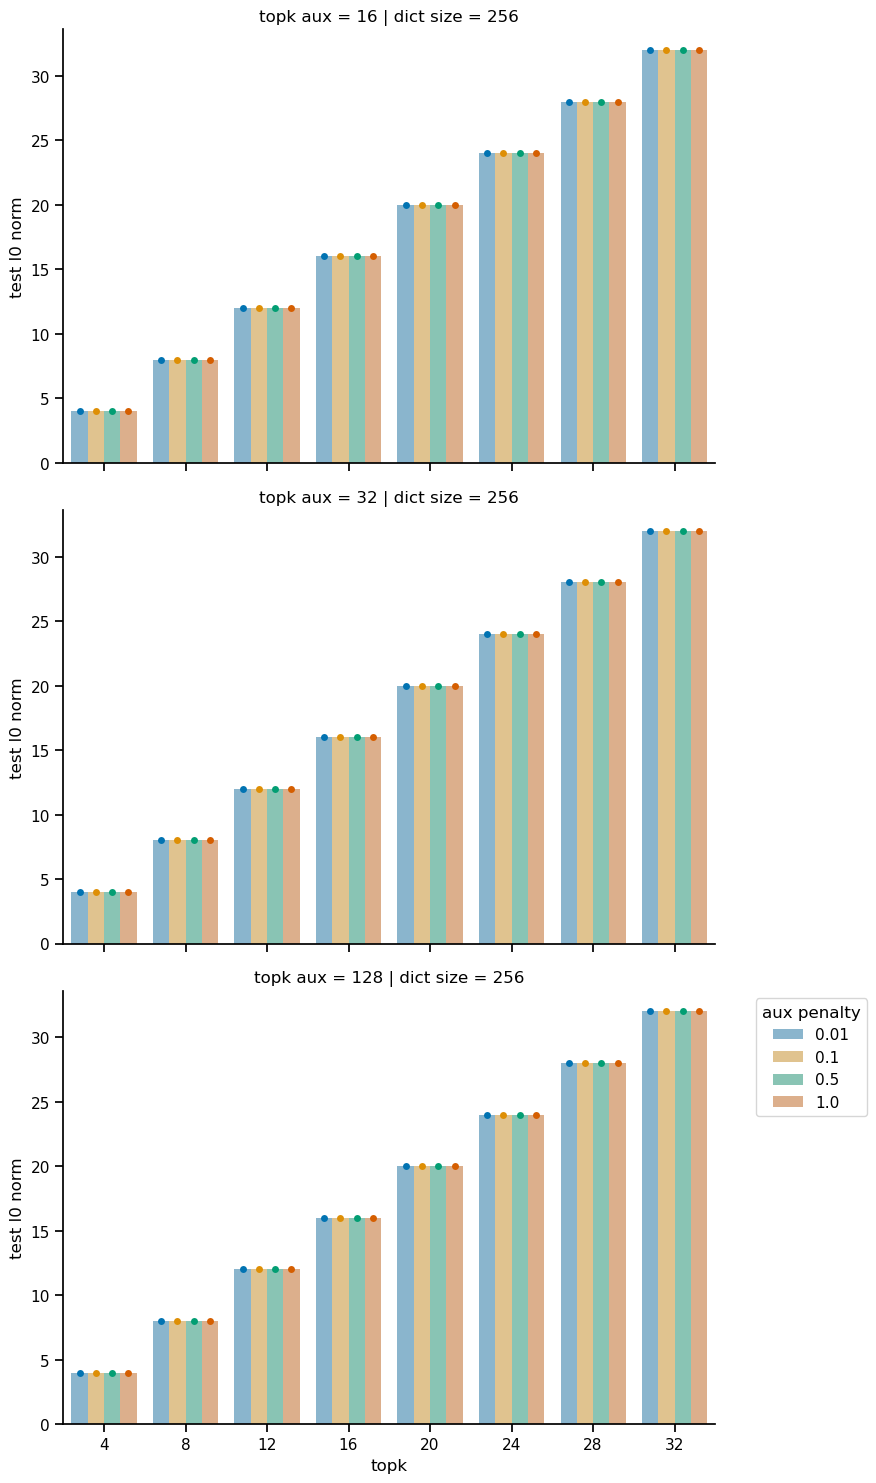

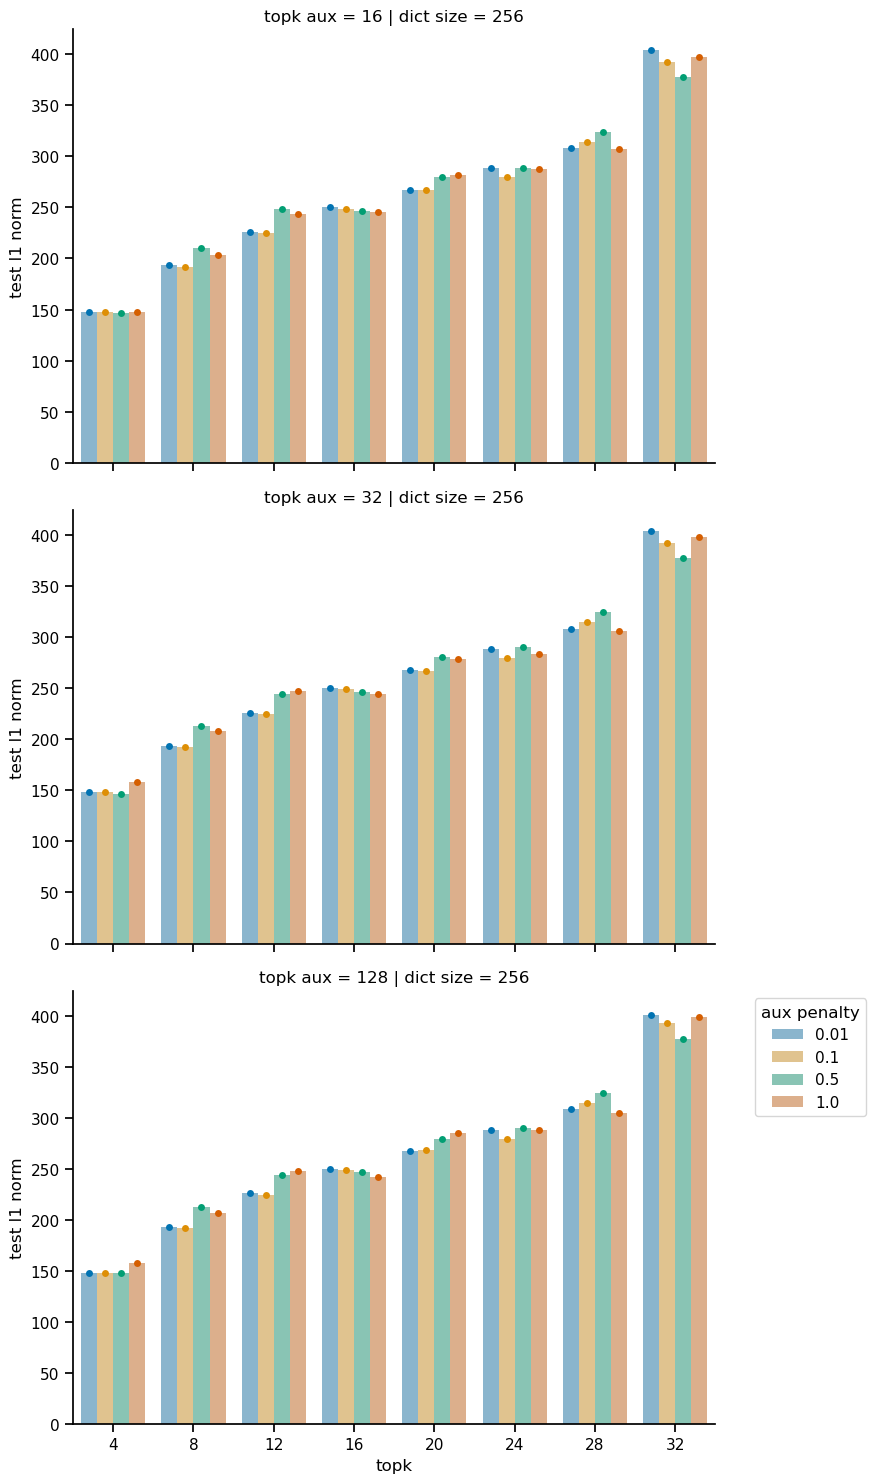

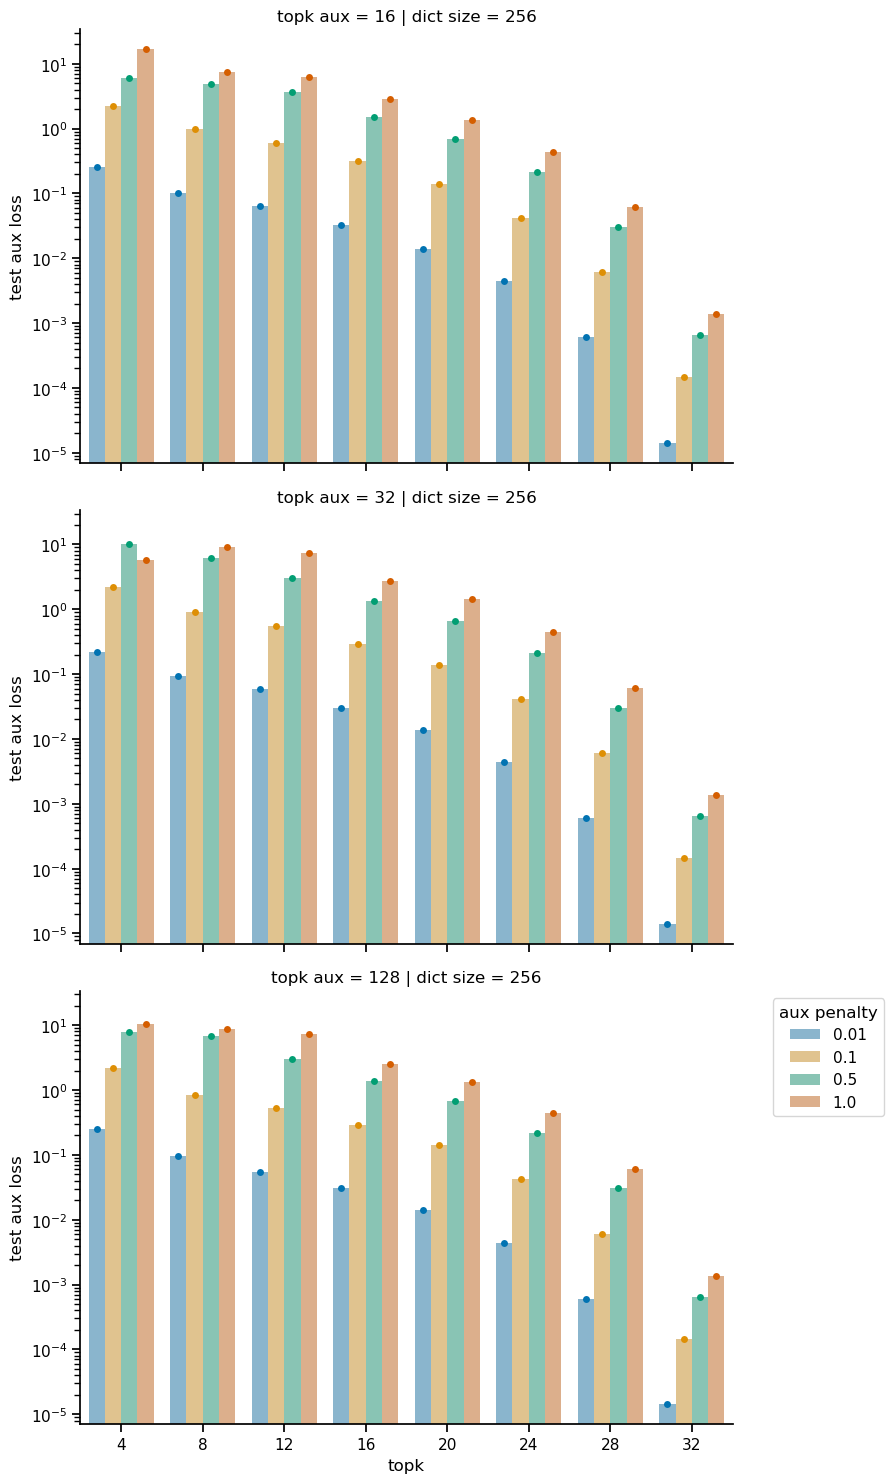

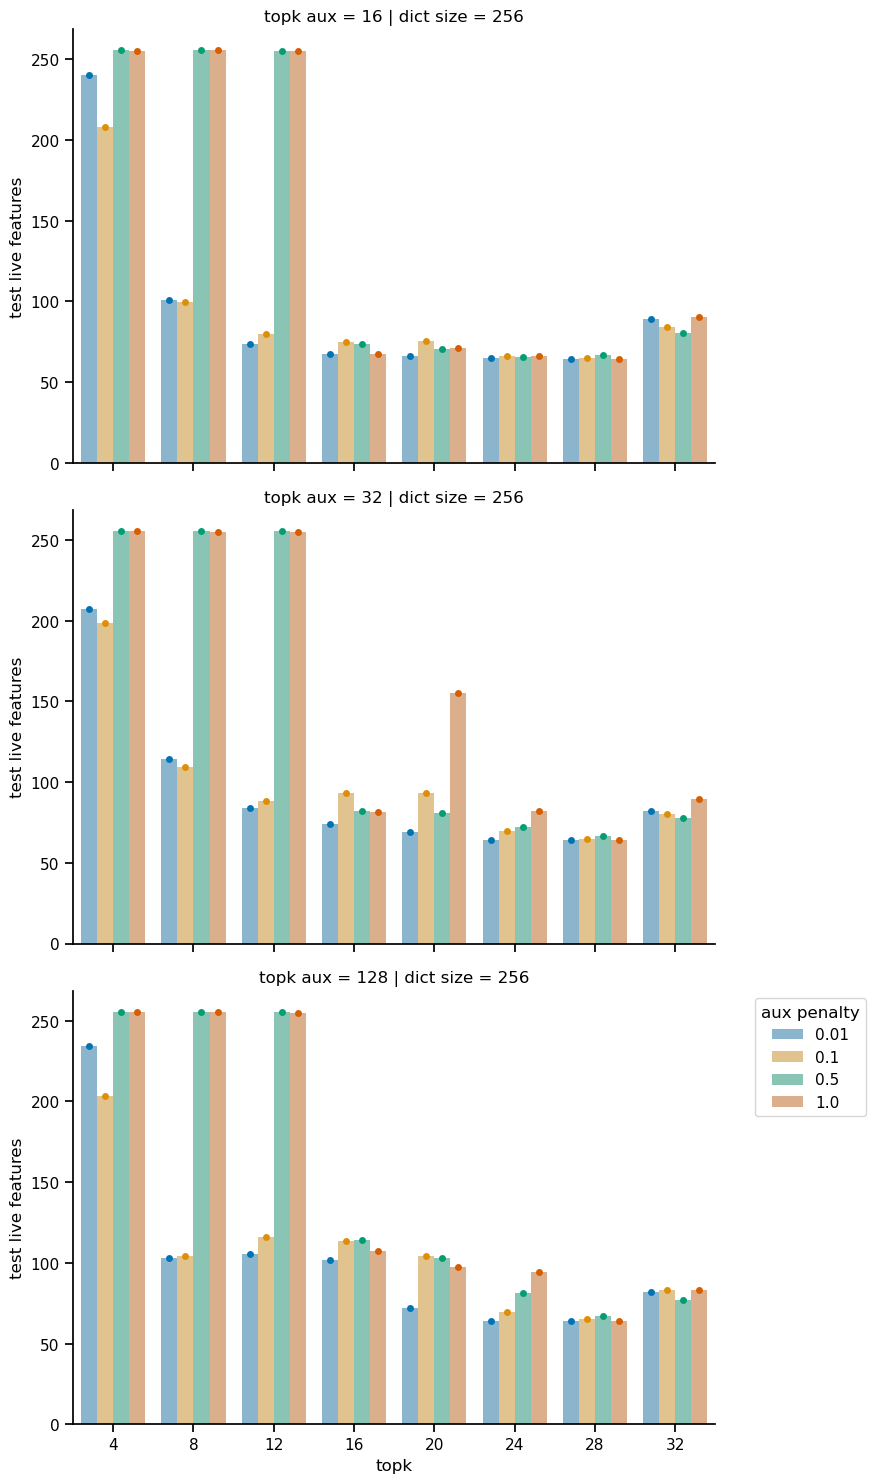

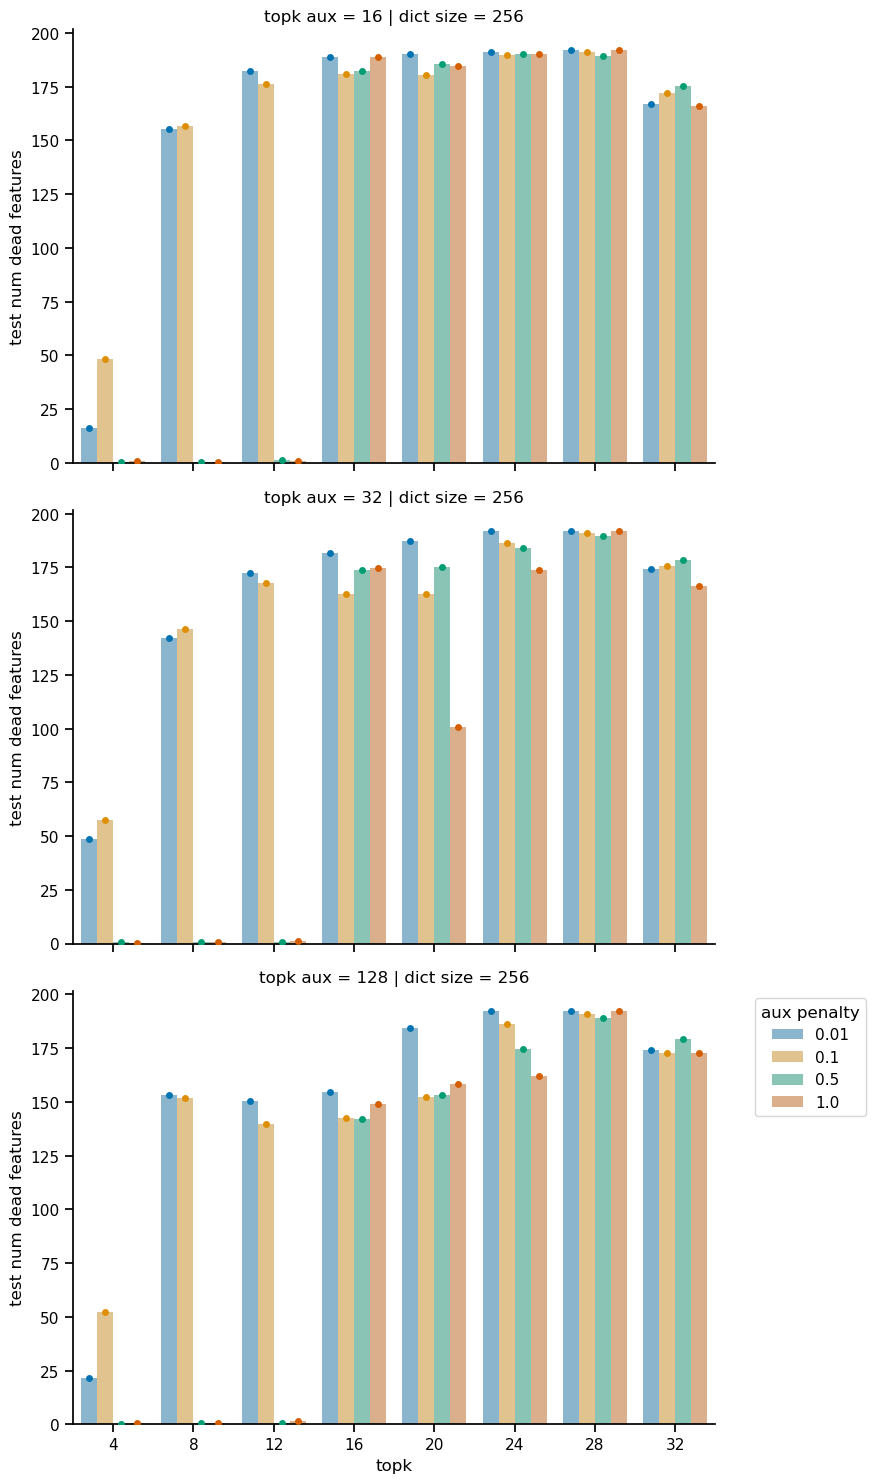

In [19]:
test_cols = ['test loss', 'test l2 loss', 'test l0 norm', 'test l1 norm', 'test aux loss','test live features','test num dead features']

test_plot['aux penalty'] = test_plot['aux penalty'].astype(str)
hue_order = ['0.01', '0.1', '0.5', '1.0']
palette = ['C0','C1','C2','C3']
for col in test_cols:
    g = sns.catplot(data=test_plot, kind='bar',
                    y=col, alpha=0.5,
                    hue='aux penalty',
                    x='topk',
                    col='dict size',
                    row='topk aux',
                    hue_order=hue_order,
                    palette=palette,
                    aspect=1.5, 
                    # col_wrap=3, 
                    legend=True)
    g.legend.remove()
    g.map_dataframe(sns.swarmplot, y=col, 
                    hue='aux penalty',
                    x='topk',
                    hue_order=hue_order,
                    palette=palette,
                    dodge=True,
                    legend=False)
    
    if col.endswith('loss'):
        plt.yscale('log')
    
    plt.legend(title='aux penalty', bbox_to_anchor=(1.05, 1), loc='upper left')


In [14]:
def simple_to_markdown(table):
    # Get column names from first row of table
    columns = [str(col).strip() for col in table[0]]
    
    # Print header row
    print("| " + " | ".join(columns) + " |")
    
    # Print separator row
    print("| " + " | ".join([''.join(["-"]*len(c)) for c in columns]) + " |")
    
    # Print data rows, starting from second row
    for row in table[1:]:
        values = []
        for val in row:
            # Try to format as scientific notation if numeric
            try:
                val_float = float(val)
                values.append(f'{val_float:.2e}')
            except:
                values.append(str(val).strip())
        print("| " + " | ".join(values) + " |")

In [15]:
import statsmodels.api as sm

# Create OLS model to predict test l2 loss
X = test_plot[['dict size', 'topk', 'topk aux', 'aux penalty']].astype(float)
X = (X-X.mean())/X.std()
y = test_plot['test l2 loss'].astype(float)

# Add constant term
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()


display(model.summary())

for table in model.summary().tables:
    print(simple_to_markdown(table))


MissingDataError: exog contains inf or nans

In [70]:
import statsmodels.api as sm
# Create OLS model to predict test l2 loss
X = test_plot[['dict size', 'topk', 'topk aux', 'aux penalty']].astype(float)
X = (X-X.mean())/X.std()
y = test_plot['test live features'].astype(float)

# Add constant term
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# Print summary
display(model.summary())

for table in model.summary().tables:
    print(simple_to_markdown(table))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     test live features   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     23.39
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           2.55e-10
Time:                        11:27:24   Log-Likelihood:                -176.28
No. Observations:                  48   AIC:                             362.6
Df Residuals:                      43   BIC:                             371.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          80.9610      1.452     55.755      0.000      78.033      83.889
dict size       1.7984      1.467      1.226      0.227      -1.161       4.758
topk           -9.1075      1.467     -6.206      0.000     -12.067      -6.148
topk aux       10.3263      1.467      7.037      0.000       7.367      13.286
aux penalty     2.9451      1.467      2.007      0.051      -0.014       5.904
==============================================================================
Omnibus:                        2.306   Durbin-Watson:                   1.212
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                2.001
Skew:                          -0.383   Prob(JB):                        0.368
Kurtosis:                       2.356   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

| Dep. Variable: | test live features | R-squared: | 0.685 |
| -------------- | ------------------ | ---------- | ----- |
| Model: | OLS | Adj. R-squared: | 0.656 |
| Method: | Least Squares | F-statistic: | 23.39 |
| Date: | Wed, 16 Apr 2025 | Prob (F-statistic): | 2.55e-10 |
| Time: | 11:27:24 | Log-Likelihood: | -176.28 |
| No. Observations: | 48 | AIC: | 362.6 |
| Df Residuals: | 43 | BIC: | 371.9 |
| Df Model: | 4 |  |  |
| Covariance Type: | nonrobust |  |  |
None
|  | coef | std err | t | P>|t| | [0.025 | 0.975] |
|  | ---- | ------- | - | ----- | ------ | ------ |
| const | 80.9610 | 1.452 | 55.755 | 0.000 | 78.033 | 83.889 |
| dict size | 1.7984 | 1.467 | 1.226 | 0.227 | -1.161 | 4.758 |
| topk | -9.1075 | 1.467 | -6.206 | 0.000 | -12.067 | -6.148 |
| topk aux | 10.3263 | 1.467 | 7.037 | 0.000 | 7.367 | 13.286 |
| aux penalty | 2.9451 | 1.467 | 2.007 | 0.051 | -0.014 | 5.904 |
None
| Omnibus: | 2.306 | Durbin-Watson: | 1.212 |
| -------- | ----- | -------------- | ----- |
| Pr

/var/folders/5_/tjkj20xs1zjbm1r6n07ccp4h0000gn/T/ipykernel_38536/391714360.py:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.relplot(data=test_plot,


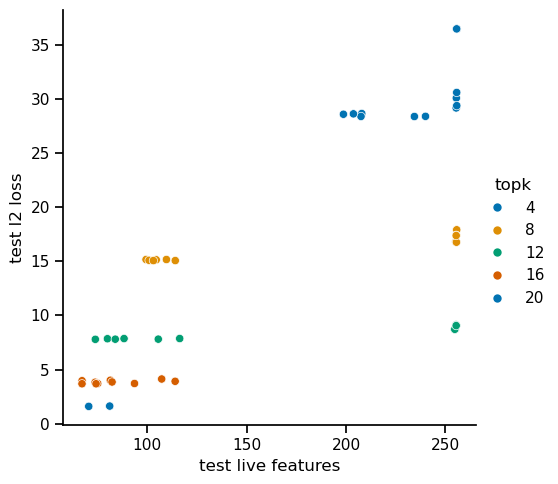

In [16]:
# hue_order = [16, 24]
# palette = ['C0', 'C1']

g = sns.relplot(data=test_plot,
                x='test live features',
                y='test l2 loss',
                # hue='aux penalty',
                hue='topk',
                # hue_order=hue_order,
                palette=palette,
                # col='dict size',
                #     row='topk aux',
                    )



In [24]:
test_plot['test live features'].min()

64.0

/var/folders/5_/tjkj20xs1zjbm1r6n07ccp4h0000gn/T/ipykernel_38536/4241453289.py:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  g = sns.relplot(data=test_plot,


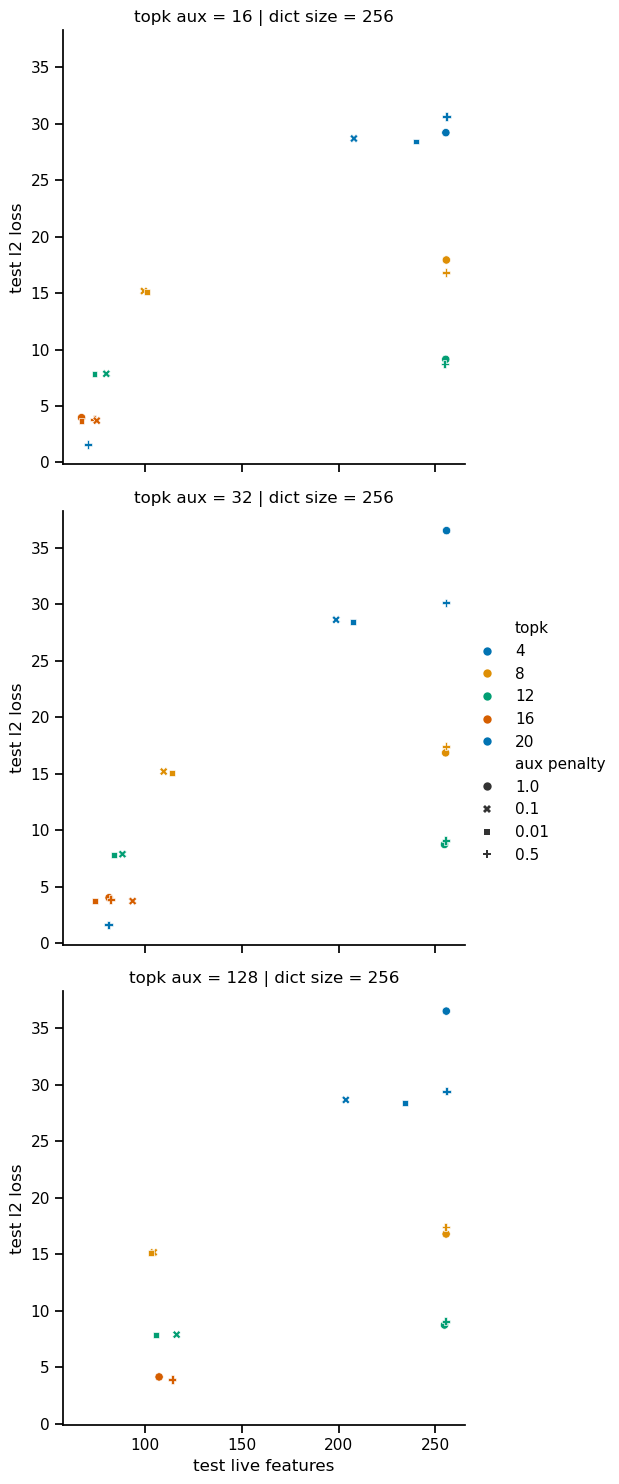

In [18]:
# hue_order = [16, 24]
# palette = ['C0', 'C1']

g = sns.relplot(data=test_plot,
                x='test live features',
                y='test l2 loss',
                style='aux penalty',
                hue='topk',
                # hue_order=hue_order,
                palette=palette,
                col='dict size',
                    row='topk aux',
                    )


/var/folders/5_/tjkj20xs1zjbm1r6n07ccp4h0000gn/T/ipykernel_38536/1009596938.py:1: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.relplot(data=test_plot,


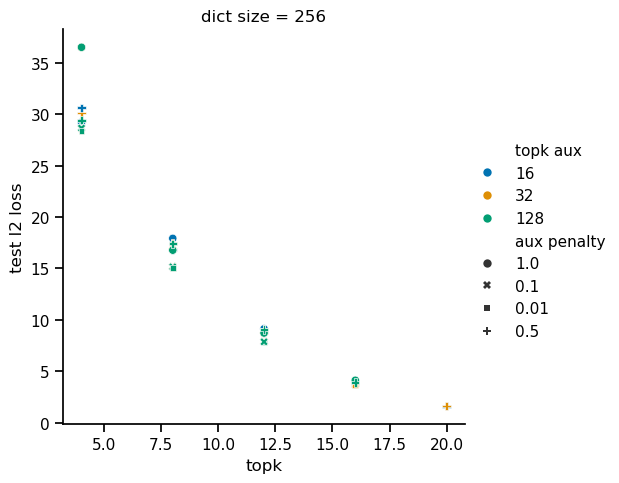

In [20]:
g = sns.relplot(data=test_plot,
                x='topk',
                y='test l2 loss',
                style='aux penalty',
                hue='topk aux',
                # hue_order=hue_order,
                palette=palette,
                col='dict size',
                    # row='',
                    )

/var/folders/5_/tjkj20xs1zjbm1r6n07ccp4h0000gn/T/ipykernel_38536/2557807224.py:1: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  g = sns.relplot(data=test_plot,


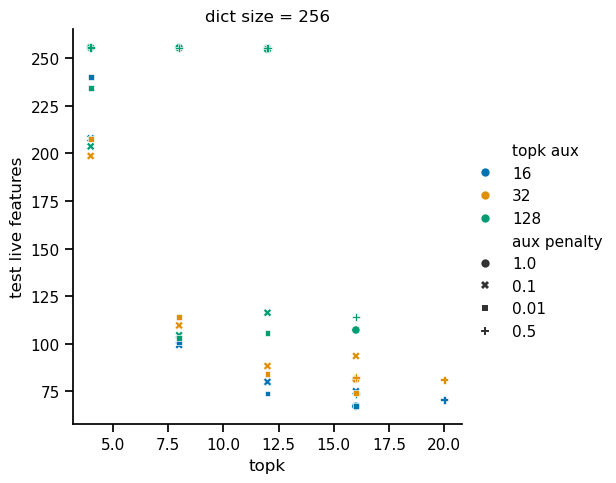

In [21]:
g = sns.relplot(data=test_plot,
                x='topk',
                y='test live features',
                style='aux penalty',
                hue='topk aux',
                # hue_order=hue_order,
                palette=palette,
                col='dict size',
                    # row='',
                    )